#     **ALZHEIMER'S CLASSIFICATION**

### Setting up the environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("E:\SEYAL\GCSD hackathon\oasis_longitudinal.csv")

### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [6]:
df['Hand'].value_counts()

R    373
Name: Hand, dtype: int64

In [7]:
df= df.drop(['Subject ID','MRI ID','Hand'] , axis=1)

In [8]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
data=df

In [9]:
df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

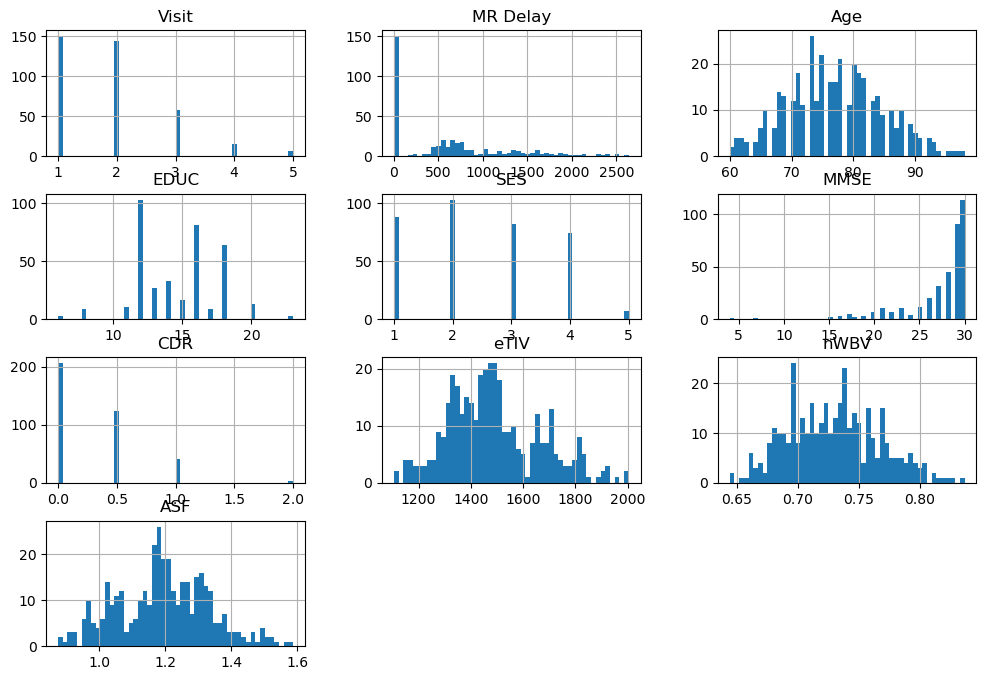

In [11]:
df.hist(bins=50 , figsize=(12,8))
plt.show()

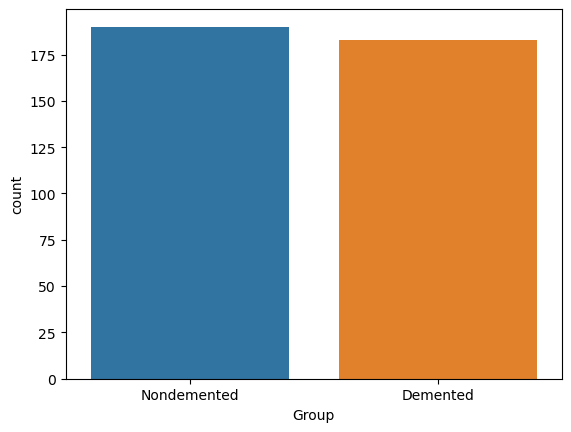

In [12]:
ax = sns.countplot(x='Group',data=df)

<AxesSubplot:xlabel='M/F', ylabel='count'>

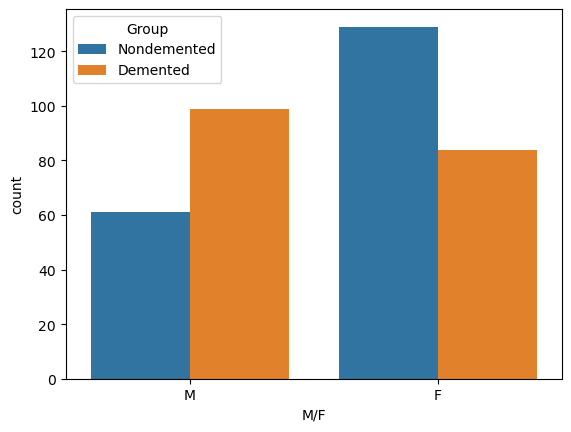

In [13]:
sns.countplot(x ='M/F', hue = "Group", data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

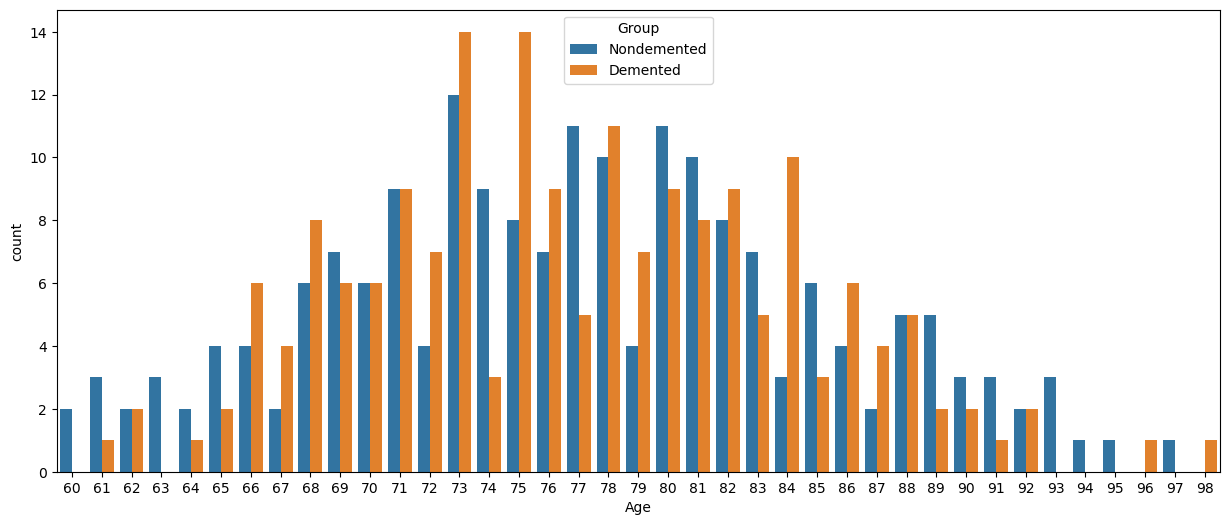

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='Group',data = df)


<AxesSubplot:xlabel='EDUC', ylabel='count'>

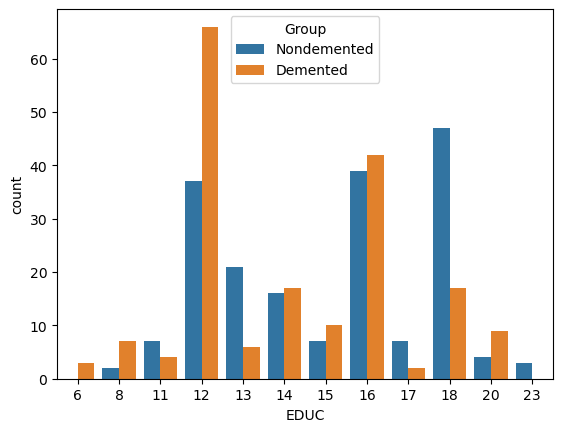

In [15]:
sns.countplot(x ='EDUC',hue='Group',data = df)

<AxesSubplot:xlabel='SES', ylabel='count'>

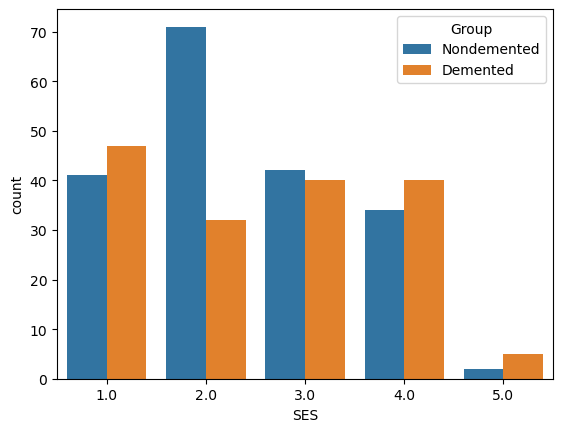

In [16]:
sns.countplot(x ='SES',hue='Group',data = df)

<AxesSubplot:xlabel='MMSE', ylabel='count'>

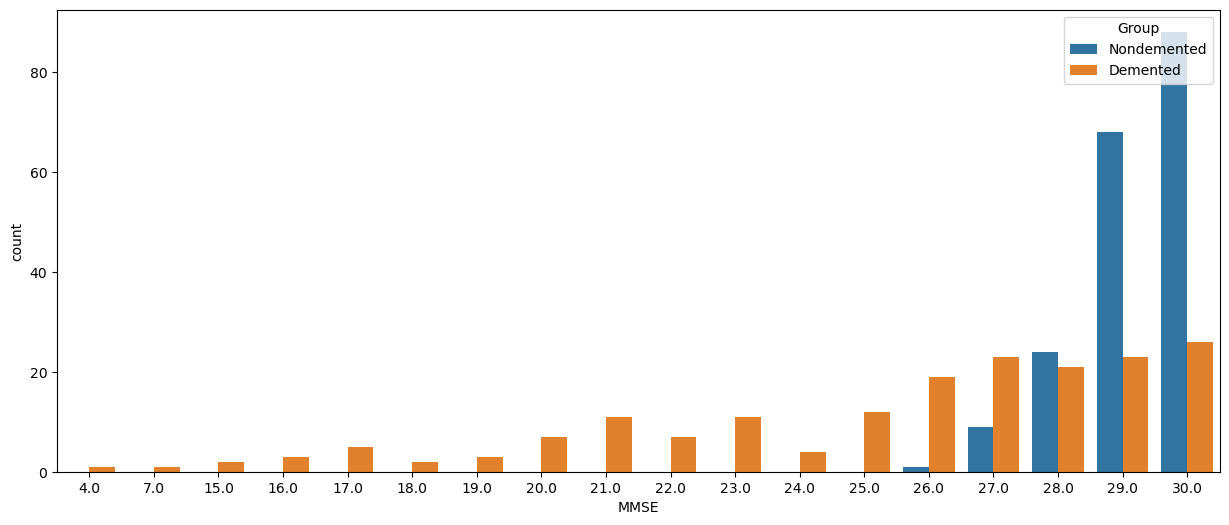

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x ='MMSE',hue='Group',data = df)

<AxesSubplot:xlabel='CDR', ylabel='count'>

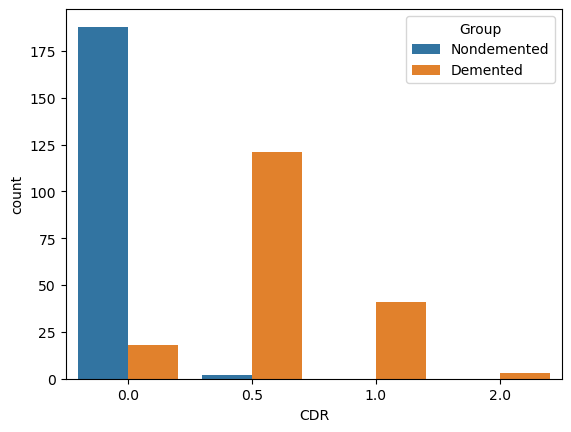

In [18]:
sns.countplot(x ='CDR',hue='Group',data = df)

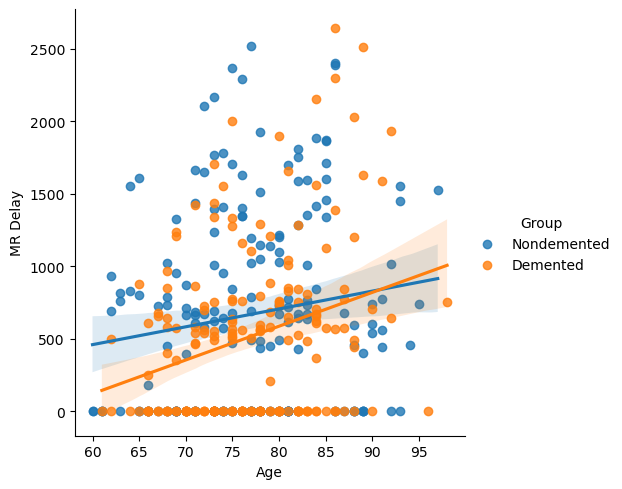

In [19]:
sns.lmplot(x="Age", y="MR Delay", hue="Group", data=df)

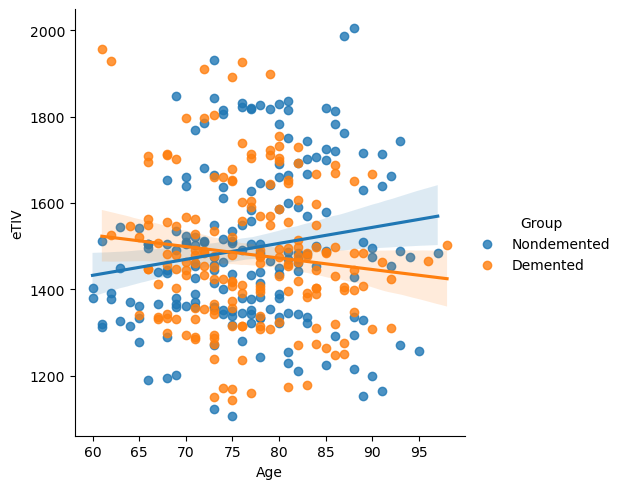

In [20]:
sns.lmplot(x="Age", y="eTIV", hue="Group", data=df)

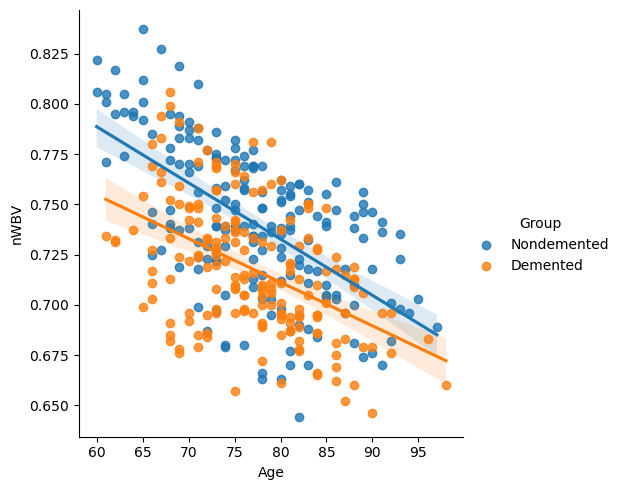

In [21]:
sns.lmplot(x="Age", y="nWBV", hue="Group", data=df)

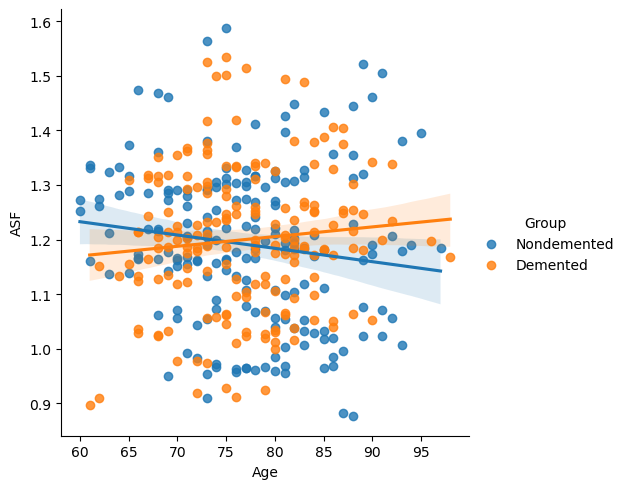

In [22]:
sns.lmplot(x="Age", y="ASF", hue="Group", data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

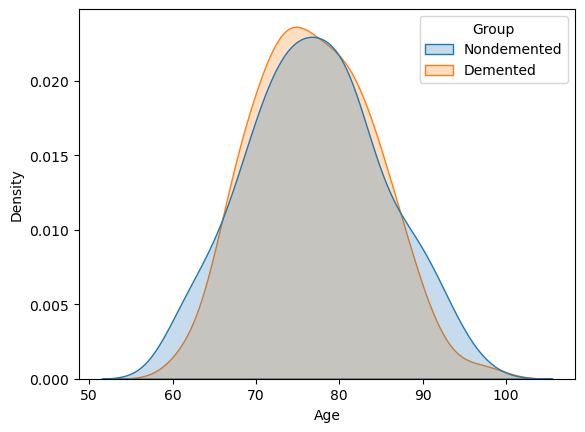

In [23]:
sns.kdeplot(data=df,x='Age',hue='Group',fill=True)

<AxesSubplot:xlabel='MR Delay', ylabel='Density'>

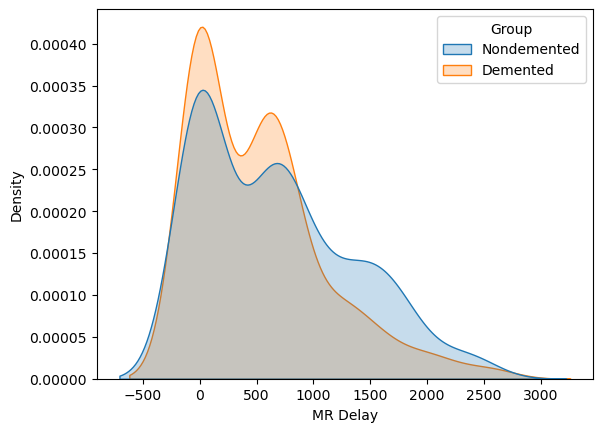

In [24]:
sns.kdeplot(data=df,x='MR Delay',hue='Group',fill=True)

<AxesSubplot:xlabel='EDUC', ylabel='Density'>

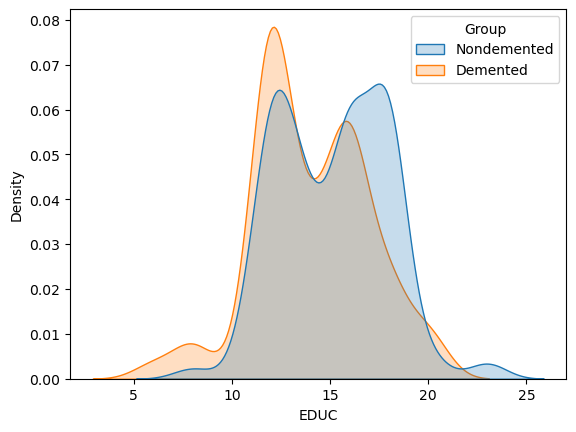

In [25]:
sns.kdeplot(data=df,x='EDUC',hue='Group',fill=True)

<AxesSubplot:xlabel='SES', ylabel='Density'>

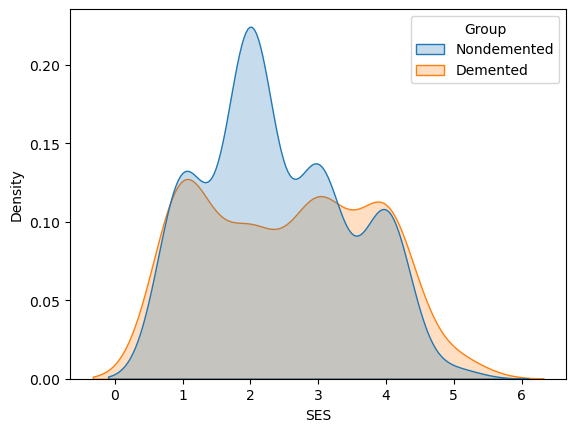

In [26]:
sns.kdeplot(data=df,x='SES',hue='Group',fill=True)

<AxesSubplot:xlabel='MMSE', ylabel='Density'>

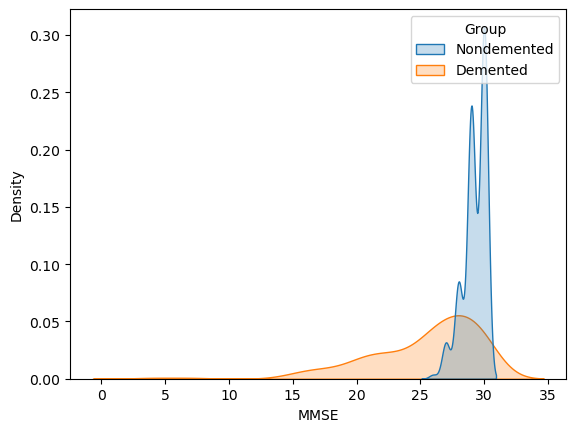

In [27]:
sns.kdeplot(data=df,x='MMSE',hue='Group',fill=True)

<AxesSubplot:xlabel='CDR', ylabel='Density'>

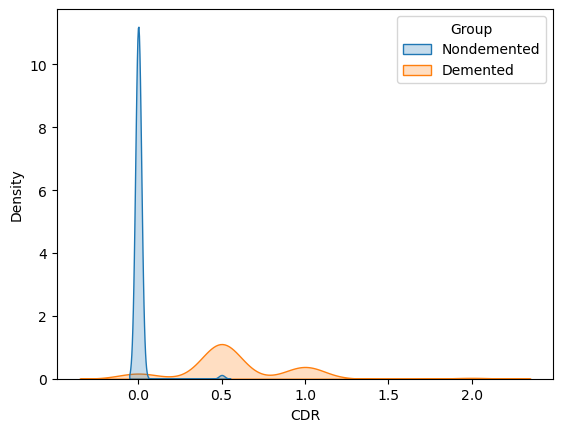

In [28]:
sns.kdeplot(data=df,x='CDR',hue='Group',fill=True)

<AxesSubplot:xlabel='eTIV', ylabel='Density'>

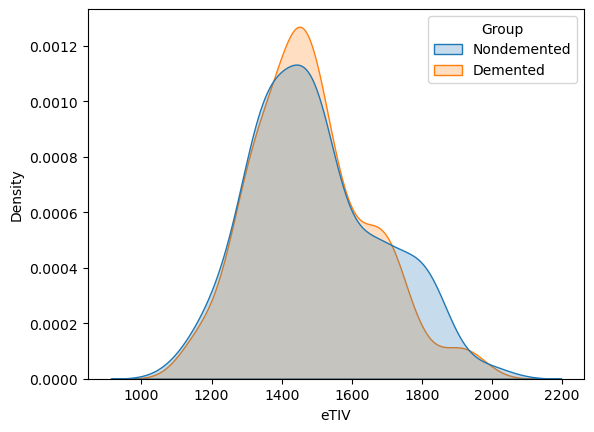

In [29]:
sns.kdeplot(data=df,x='eTIV',hue='Group',fill=True)

<AxesSubplot:xlabel='nWBV', ylabel='Density'>

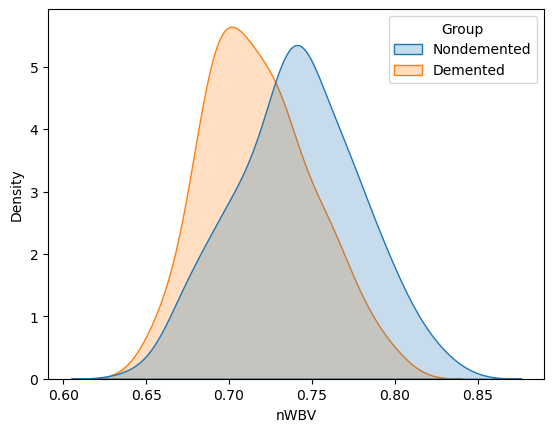

In [30]:
sns.kdeplot(data=df,x='nWBV',hue='Group',fill=True)

<AxesSubplot:xlabel='ASF', ylabel='Density'>

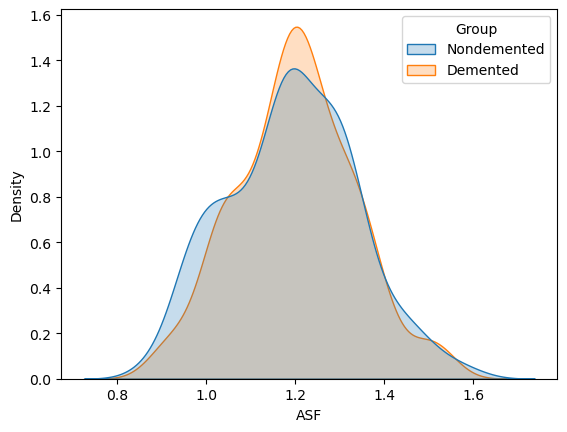

In [31]:
sns.kdeplot(data=df,x='ASF',hue='Group',fill=True)

### Data Preprocessing

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['M/F']= label_encoder.fit_transform(df['M/F'])
df['Group']= label_encoder.fit_transform(df['Group'])
df['Group'].unique()

array([1, 0])

In [33]:
X = df.drop(['Group'],axis=1)
Y = df['Group']

In [34]:
X_train , Y_train , X_test , Y_test = X[:300] , Y[:300] , X[300:] , Y[300:]

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [36]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [37]:
from sklearn.compose import make_column_selector , make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline , make_column_selector(dtype_include=np.number)),
    (cat_pipeline , make_column_selector(dtype_include=object)),
)

### Model Training-Testing

In [50]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [51]:
svm_clf = make_pipeline(preprocessing , LinearSVC(C=1 , random_state=42))
knn_clf = make_pipeline(preprocessing , KNeighborsClassifier(n_neighbors = 3))
tree_clf = make_pipeline(preprocessing , DecisionTreeClassifier(max_depth=2 , random_state=42))
forest_clf = make_pipeline(preprocessing , RandomForestClassifier(max_depth=2,random_state=42))
sgd_clf = make_pipeline(preprocessing , SGDClassifier(random_state=42))


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
svm_clf.fit(X_train , Y_train)
Y_pred = svm_clf.predict(X_test)
print('Testing set accuracy of the model: {0}%'.format(accuracy_score(Y_test,Y_pred)*100))
acc_svm = accuracy_score(Y_test,Y_pred)*100

Testing set accuracy of the model: 95.8904109589041%


In [54]:
knn_clf.fit(X_train , Y_train)
Y_pred = knn_clf.predict(X_test)
print('Testing set accuracy of the model: {0}%'.format(accuracy_score(Y_test,Y_pred)*100))
acc_knn = accuracy_score(Y_test,Y_pred)*100

Testing set accuracy of the model: 95.8904109589041%


C:\Users\RAJAMOHAN.J\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
tree_clf.fit(X_train , Y_train)
Y_pred = tree_clf.predict(X_test)
print('Testing set accuracy of the model: {0}%'.format(accuracy_score(Y_test,Y_pred)*100))
acc_tree = accuracy_score(Y_test,Y_pred)*100

Testing set accuracy of the model: 97.26027397260275%


In [56]:
forest_clf.fit(X_train , Y_train)
Y_pred = forest_clf.predict(X_test)
print('Testing set accuracy of the model: {0}%'.format(accuracy_score(Y_test,Y_pred)*100))
acc_forest = accuracy_score(Y_test,Y_pred)*100

Testing set accuracy of the model: 95.8904109589041%


In [57]:
models = pd.DataFrame({
    'Model': ['Linear SVC', 'KNeighbors Classifier','Decision Tree' ,
              'Random Forest'],
    'Accuracy': [acc_svm, acc_knn, acc_tree,
              acc_forest,]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,97.260274
0,Linear SVC,95.890411
1,KNeighbors Classifier,95.890411
3,Random Forest,95.890411


### Error Analysis

In [46]:
forest_clf.fit(X_train , Y_train)
Y_pred = forest_clf.predict(X_test)

In [47]:
import pickle
pickle.dump(forest_clf , open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [48]:
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.95      0.97      0.96        38

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



<AxesSubplot:>

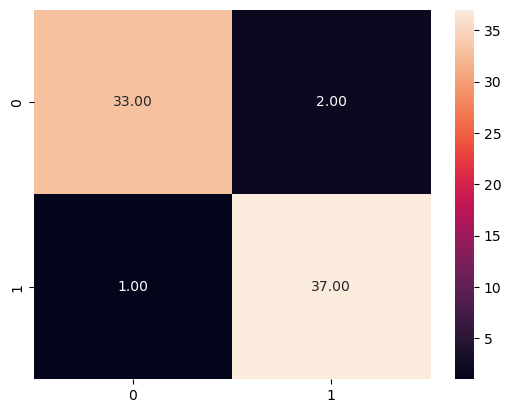

In [49]:
import seaborn as sn
cm = metrics.confusion_matrix(Y_test,Y_pred)
sn.heatmap(cm, annot=True , fmt='.2f')